In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
titanic_train = pd.read_csv("train.csv")

In [10]:
titanic_train = titanic_train.set_index("PassengerId")

In [11]:
titanic_train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [13]:
titanic_train[["Age","Fare"]].describe()

,Age,Fare
count,714.000000,891.000000
mean,29.699118,32.204208
std,14.526497,49.693429
min,0.420000,0.000000
25%,20.125000,7.910400
50%,28.000000,14.454200
75%,38.000000,31.000000
max,80.000000,512.329200


In [14]:
titanic_train[["Cabin","Embarked"]].describe()

,Cabin,Embarked
count,204,889
unique,147,3
top,B96 B98,S
freq,4,644


### Building models: Since this is a classification problem, I am using LogisticRegression, DecisionTreeClassifier and RandomForestClassifier

In [62]:
#Splitting the data
data = titanic_train.loc[:,["Survived","Pclass","Sex","Age","Fare"]]

In [63]:
data.Sex = data.Sex.map({"male":0,"female":1})

In [64]:
data

,Survived,Pclass,Sex,Age,Fare
PassengerId,,,,,
1,0,3,0,22.0,7.2500
2,1,1,1,38.0,71.2833
3,1,3,1,26.0,7.9250
4,1,1,1,35.0,53.1000
5,0,3,0,35.0,8.0500
...,...,...,...,...,...
887,0,2,0,27.0,13.0000
888,1,1,1,19.0,30.0000
889,0,3,1,NaN,23.4500


In [65]:
data.Fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

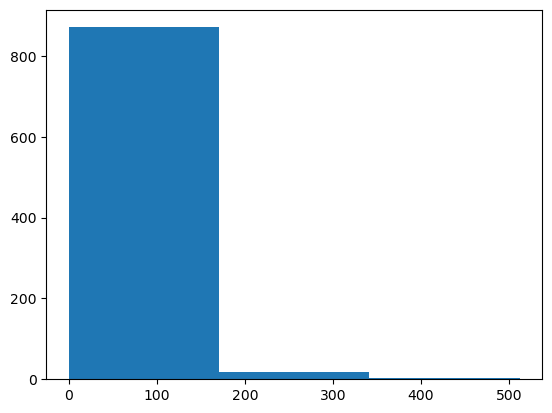

In [66]:
plt.hist(data.Fare,bins = 3)
plt.show()

#### The Fare ranges from 0 to 512.33
Thus by binning into range 0-170,170-340,340-512 as low(0) medium(1) high(2) respectively

In [67]:
def returnPriceRange(x):
    if 0<=x<170:
        return 0
    if 170<=x<340:
        return 1
    else:
        return 2

data.Fare.apply(returnPriceRange).value_counts()

Fare
0    871
1     17
2      3
Name: count, dtype: int64

In [68]:
data.Fare = data.Fare.apply(returnPriceRange)

In [69]:
data.head()

,Survived,Pclass,Sex,Age,Fare
PassengerId,,,,,
1,0,3,0,22.0,0
2,1,1,1,38.0,0
3,1,3,1,26.0,0
4,1,1,1,35.0,0
5,0,3,0,35.0,0


In [70]:
data.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

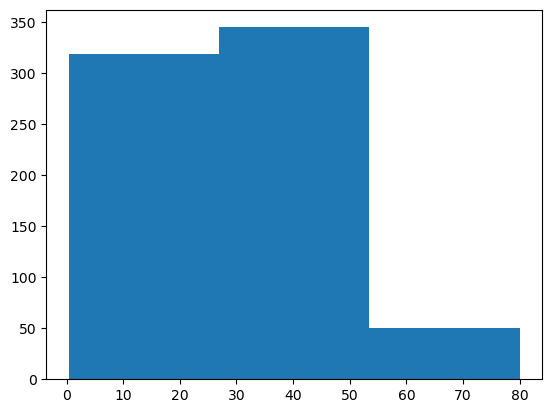

In [71]:
plt.hist(data.Age,bins = 3)
plt.show()

In [72]:
def returnAgeRange(x):
    if 0<=x<27:
        return 0
    if 27<=x<54:
        return 1
    else:
        return 2

In [73]:
data.Age = data.Age.apply(returnAgeRange)

In [74]:
data.head()

,Survived,Pclass,Sex,Age,Fare
PassengerId,,,,,
1,0,3,0,0,0
2,1,1,1,1,0
3,1,3,1,0,0
4,1,1,1,1,0
5,0,3,0,1,0


In [75]:
X = data.drop("Survived",axis = 1)
y = data.Survived

In [76]:
X

,Pclass,Sex,Age,Fare
PassengerId,,,,
1,3,0,0,0
2,1,1,1,0
3,3,1,0,0
4,1,1,1,0
5,3,0,1,0
...,...,...,...,...
887,2,0,1,0
888,1,1,0,0
889,3,1,2,0


In [78]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

### 1. LogisticRegression

In [104]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter = 100)

In [105]:
lr.fit(X_train,y_train)

LogisticRegression()

In [106]:
y_predictions_lr = lr.predict(X_test)

In [107]:
lr.score(X_test,y_test) #chiiiii

0.7486033519553073

### 2. DecisionTreeClassifier

In [108]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()

In [109]:
dtc.fit(X_train,y_train)

DecisionTreeClassifier()

In [110]:
y_predictions_dtc = dtc.predict(X_test)

In [112]:
dtc.score(X_test,y_test) #not better bhai

0.7653631284916201

### 3. RandomForestClassifier

In [129]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=50)

In [130]:
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=50)

In [131]:
y_predictions_rfc = rfc.predict(X_test)

In [132]:
rfc.score(X_test,y_test) #ye bhi bawasir

0.7653631284916201

## After evaluation:
DecisionTreeClassifier/RandomForestClassifier give the best scores, hence we shall proceed with them for submission

In [133]:
test_data = pd.read_csv("test.csv")
test_data = test_data.set_index("PassengerId")

In [134]:
test_data

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...
1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S


In [135]:
test_data_1 = test_data.loc[:,["Pclass","Sex","Age","Fare"]]

In [136]:
test_data_1.Sex = test_data_1.Sex.map({"male":0,"female":1})

In [137]:
test_data_1.Fare = test_data_1.Fare.apply(returnPriceRange)

In [138]:
test_data_1.Age = test_data_1.Age.apply(returnAgeRange)

In [139]:
test_data_1

,Pclass,Sex,Age,Fare
PassengerId,,,,
892,3,0,1,0
893,3,1,1,0
894,2,0,2,0
895,3,0,1,0
896,3,1,0,0
...,...,...,...,...
1305,3,0,2,0
1306,1,1,1,0
1307,3,0,1,0


In [140]:
predictions = dtc.predict(test_data_1)

In [141]:
predictions

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [143]:
test_data.index

Index([ 892,  893,  894,  895,  896,  897,  898,  899,  900,  901,
       ...
       1300, 1301, 1302, 1303, 1304, 1305, 1306, 1307, 1308, 1309],
      dtype='int64', name='PassengerId', length=418)

In [144]:
predictions_df = pd.DataFrame(data = predictions,index = test_data.index)

In [147]:
predictions_df = predictions_df.rename(columns = {0:"Survived"})

In [149]:
predictions_df.to_csv("TitanicDatasetPrediction.csv")

In [150]:
predictions_df

,Survived
PassengerId,
892,0
893,0
894,0
895,0
896,1
...,...
1305,0
1306,1
1307,0


In [155]:
try1 = pd.read_csv("TitanicDatasetPrediction.csv",index_col = "PassengerId")

In [156]:
try1

,Survived
PassengerId,
892,0
893,0
894,0
895,0
896,1
...,...
1305,0
1306,1
1307,0
